In [ ]:
pip install alpha_vantage

In [3]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

## Loading The DataSets

In [ ]:
confirmed_cases =pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
global_deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
country_code = pd.read_csv('country_code_mapping.csv')

In [ ]:
country_code

,country,alpha-2_code,alpha-3_code,numeric_code,iso_3166-2
0,Afghanistan,AF,AFG,4.0,ISO 3166-2:AF
1,Åland Islands,AX,ALA,248.0,ISO 3166-2:AX
2,Albania,AL,ALB,8.0,ISO 3166-2:AL
3,Algeria,DZ,DZA,12.0,ISO 3166-2:DZ
4,American Samoa,AS,ASM,16.0,ISO 3166-2:AS
...,...,...,...,...,...
244,Western Sahara,EH,ESH,732.0,ISO 3166-2:EH
245,Yemen,YE,YEM,887.0,ISO 3166-2:YE
246,Zambia,ZM,ZMB,894.0,ISO 3166-2:ZM
247,Zimbabwe,ZW,ZWE,716.0,ISO 3166-2:ZW


In [ ]:
confirmed_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,205612,205612,205802,205830,205907,206073,206133,206145,206206,206273
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,333322,333330,333330,333338,333343,333360,333381,333391,333408,333413
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271061,271061,271079,271082,271090,271096,271100,271102,271107,271113
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,46824,46824,46824,46824,47219,47219,47219,47219,47219,47219
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,104491,104491,104491,104491,104676,104676,104676,104676,104676,104750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703036,703036,703036,703036,703036,703036,703036,703036,703036,703036
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,333721,333721,333721,333746,333746,333746,333746,333746,333746,333746


In [ ]:
global_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7833,7833,7833,7833,7833,7834,7834,7834,7834,7835
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3594,3594,3594,3594
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,156,156,156,156,157,157,157,157,157,157
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1923,1923,1923,1923,1924,1924,1924,1924,1924,1925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4019,4019,4019,4019,4019,4019,4019,4019,4019,4019


## Drop Unnecessary Data

In [ ]:
confirmed_cases.drop(['Lat','Long','Province/State'], axis = 1,inplace = True)
global_deaths.drop(['Lat','Long','Province/State'], axis = 1,inplace = True)

## Aggregate (sum) Data on Country/Region

In [ ]:
confirmed_cases = confirmed_cases.groupby('Country/Region').sum()
global_deaths = global_deaths.groupby('Country/Region').sum()

In [ ]:
confirmed_cases.reset_index(inplace=True)
global_deaths.reset_index(inplace=True)

In [ ]:
confirmed_cases.shape

(201, 1050)

In [ ]:
global_deaths.shape

(201, 1050)

## Changing the Dataframe in desired format

In [ ]:
confirmed_cases = confirmed_cases.melt('Country/Region', var_name='Date',value_name='Confirmed')
global_deaths = global_deaths.melt('Country/Region', var_name='Date',value_name='Deaths')

In [ ]:
confirmed_cases

,Country/Region,Date,Confirmed
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0
...,...,...,...
210844,West Bank and Gaza,12/5/22,703036
210845,Winter Olympics 2022,12/5/22,535
210846,Yemen,12/5/22,11945
210847,Zambia,12/5/22,333746


In [ ]:
global_deaths

,Country/Region,Date,Deaths
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0
...,...,...,...
210844,West Bank and Gaza,12/5/22,5708
210845,Winter Olympics 2022,12/5/22,0
210846,Yemen,12/5/22,2159
210847,Zambia,12/5/22,4019


## Merging Data Frames

In [ ]:
merged_df = pd.merge(confirmed_cases,global_deaths,how= 'left')

In [ ]:
merged_df

,Country/Region,Date,Confirmed,Deaths,Week,Month,Year
0,Afghanistan,2020-01-22,0,0,4,1,2020
1,Albania,2020-01-22,0,0,4,1,2020
2,Algeria,2020-01-22,0,0,4,1,2020
3,Andorra,2020-01-22,0,0,4,1,2020
4,Angola,2020-01-22,0,0,4,1,2020
...,...,...,...,...,...,...,...
210643,West Bank and Gaza,2022-12-04,703036,5708,48,12,2022
210644,Winter Olympics 2022,2022-12-04,535,0,48,12,2022
210645,Yemen,2022-12-04,11945,2159,48,12,2022
210646,Zambia,2022-12-04,333746,4019,48,12,2022


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210648 entries, 0 to 210647
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Country/Region  210648 non-null  object
 1   Date            210648 non-null  object
 2   Confirmed       210648 non-null  int64 
 3   Deaths          210648 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 8.0+ MB


## Seperating month and week from data frame

In [ ]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df['Week'] = merged_df['Date'].dt.isocalendar().week
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['Year'] = merged_df['Date'].dt.isocalendar().year

In [ ]:
merged_df

,Country/Region,Date,Confirmed,Deaths,Week,Month,Year
0,Afghanistan,2020-01-22,0,0,4,1,2020
1,Albania,2020-01-22,0,0,4,1,2020
2,Algeria,2020-01-22,0,0,4,1,2020
3,Andorra,2020-01-22,0,0,4,1,2020
4,Angola,2020-01-22,0,0,4,1,2020
...,...,...,...,...,...,...,...
210643,West Bank and Gaza,2022-12-04,703036,5708,48,12,2022
210644,Winter Olympics 2022,2022-12-04,535,0,48,12,2022
210645,Yemen,2022-12-04,11945,2159,48,12,2022
210646,Zambia,2022-12-04,333746,4019,48,12,2022


## Canada & USa Merged Cases


In [ ]:
can_merge = merged_df[merged_df['Country/Region']=='Canada']
usa_merge = merged_df[merged_df['Country/Region']=='US']

## Creating a weekly Data frame

In [ ]:
week_df = merged_df.groupby(['Year',"Week"])['Confirmed','Deaths'].sum()
week_df.reset_index(inplace=True)
week_df['Date'] = week_df['Year'].astype(str) +'-'+ week_df['Week'].astype(str)

C:\Users\malpo\AppData\Local\Temp\ipykernel_7400\2852297762.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  week_df = merged_df.groupby(['Year',"Week"])['Confirmed','Deaths'].sum()


In [ ]:
week_df

,Year,Week,Confirmed,Deaths,Date
0,2020,4,5715,159,2020-4
1,2020,5,61667,1356,2020-5
2,2020,6,213929,4561,2020-6
3,2020,7,400406,9588,2020-7
4,2020,8,534743,15444,2020-8
...,...,...,...,...,...
145,2022,44,4424462277,46193446,2022-44
146,2022,45,4441850855,46260960,2022-45
147,2022,46,4461165074,46326161,2022-46
148,2022,47,4482514535,46392535,2022-47


## Creating Monthly Data Frame

In [ ]:
monthly_df = merged_df.groupby(['Year',"Month"])['Confirmed','Deaths'].sum()
monthly_df.reset_index(inplace=True)
monthly_df['Year_Month'] =monthly_df['Year'].astype(str) +'-'+ monthly_df['Month'].astype(str)

C:\Users\malpo\AppData\Local\Temp\ipykernel_7400\2615588661.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly_df = merged_df.groupby(['Year',"Month"])['Confirmed','Deaths'].sum()


In [ ]:
monthly_df

,Year,Month,Confirmed,Deaths,Year_Month
0,2020,1,254809486,5762193,2020-1
1,2020,2,1672160,46976,2020-2
2,2020,3,8977391,415196,2020-3
3,2020,4,63570196,4658016,2020-4
4,2020,5,145168537,10431971,2020-5
5,2020,6,246825439,14442622,2020-6
6,2020,7,431892698,19814573,2020-7
7,2020,8,672201893,25587086,2020-8
8,2020,9,895624965,30028623,2020-9
9,2020,10,1229723155,36375174,2020-10


## Initializing the Api

In [ ]:
demo = 'ZTG83NQM6OS2EF6H'
ts = TimeSeries(key = demo, output_format='pandas')#,indexing_type='date')

### Selecting the stocks :
* Overall American Market - 'SPY' SPDR S&P 500 ETF Trust
* Overall Canadian Market - 'TSE' Toronto Stock Exchange 
* Travel sector - 'AG' Lufthansa Airlines
* The Real Estate sector - 'PLD' Prologis Inc
* Precious metals -  'GOLD' GOLD


In [ ]:
#TIME intervals are:
    #INTRADAY , DAILY , DAILY_ADJUSTED , WEEKLY , MONTHLY , YEARLY
    #need to pay for intraday

## Function for mothly data aggergation 

In [ ]:
def monthly(x):
    gr = [hi,lo]
    stock1 = x.groupby(['Year',"Month"])[gr].sum()  
    stock1.reset_index(inplace=True)  
    stock1['Year_Month'] = stock1['Year']+ '-' + stock1['Month']
    stock1.drop(['Year','Month'], axis = 1,inplace = True)
    return stock1

## Function for weekly data Aggeragtion

In [ ]:
def weekly(y):
    gr = [hi,lo]
    stock2 = y.groupby(['Year',"Week"])[gr].sum()  
    stock2.reset_index(inplace=True)  
    stock2['Year_Week'] = stock2['Year'].astype(str)+ '-' + stock2['Week'].astype(str)
    stock2.sort_values('Year',ascending=False)
    stock2.drop(['Year','Week'], axis = 1,inplace = True)
    return stock2


In [ ]:
stock = ['SPY','TSE','AG','PLD']#,'GOLD']
for tick in stock:
    data,meta_data = ts.get_daily_adjusted(symbol=tick, outputsize='full')
    data.reset_index(inplace=True)
    stock = data[['date','2. high','3. low']]
    stock['date'] = pd.to_datetime(stock['date'])
    hi = tick + '_h'
    lo = tick + '_l'
    li = ['date',hi,lo]
    stock.columns = li
    stock['Year'] = stock['date'].dt.isocalendar().year
    stock['Week'] = stock['date'].dt.isocalendar().week
    stock['Month'] = stock['date'].dt.month
    w = weekly(stock)

ValueError: Thank you for using Alpha Vantage! Our standard API call frequency is 5 calls per minute and 500 calls per day. Please visit https://www.alphavantage.co/premium/ if you would like to target a higher API call frequency.

In [ ]:
w

,GOLD_h,GOLD_l,Year_Week
0,90.1900,87.6300,1999-44
1,92.0700,87.8200,1999-45
2,91.2600,88.4400,1999-46
3,76.0700,73.3100,1999-47
4,90.0600,87.9900,1999-48
...,...,...,...
1201,79.2200,76.2500,2022-45
1202,80.2700,78.3000,2022-46
1203,64.1500,62.4294,2022-47
1204,82.9700,80.1600,2022-48


In [ ]:
monthly_df = pd.merge(monthly_df,stock1, on = 'Year_Month')

## Pulling Canada Stock

In [ ]:
data,meta_data = ts.get_daily_adjusted(symbol='TSE', outputsize='full')
data.reset_index(inplace=True)
stock = data[['date','2. high','3. low']]
stock['date'] = pd.to_datetime(stock['date'])
hi = tick + '_h'
lo = tick + '_l'
li = ['date',hi,lo]
stock.columns = li
stock['Year'] = stock['date'].dt.isocalendar().year
stock['Week'] = stock['date'].dt.isocalendar().week
stock['Month'] = stock['date'].dt.month

C:\Users\malpo\AppData\Local\Temp\ipykernel_7400\3608478077.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['date'] = pd.to_datetime(stock['date'])
C:\Users\malpo\AppData\Local\Temp\ipykernel_7400\3608478077.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['Year'] = stock['date'].dt.isocalendar().year
C:\Users\malpo\AppData\Local\Temp\ipykernel_7400\3608478077.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [ ]:
gr =[hi,lo]
stock = stock.groupby(['Year',"Month"])[gr].sum()
stock.reset_index(inplace=True)   
stock['Year_Month'] = stock['Year'].astype(str)+ '-' + stock['Month'].astype(str)
stock.drop(['Year','Month'], axis = 1,inplace = True)

In [ ]:
stock

,SPY_h,SPY_l,Year_Month
0,286.8800,272.8700,2014-6
1,444.8400,424.1500,2014-7
2,397.0600,384.3600,2014-8
3,380.1850,368.4400,2014-9
4,335.2200,324.5621,2014-10
...,...,...,...
98,734.0352,705.8500,2022-8
99,508.5982,483.1642,2022-9
100,401.0591,381.7600,2022-10
101,517.6200,487.4616,2022-11


In [ ]:
monthly_df = pd.merge(monthly_df,stock,on = 'Year_Month')

In [ ]:
monthly_df['Year_Month'] = pd.to_datetime(monthly_df['Year_Month'])

In [ ]:
monthly_df

,Year,Month,Confirmed,Deaths,Year_Month,SPY_h,SPY_l
0,2020,1,254809486,5762193,2020-01-01,718.7850,693.4260
1,2020,2,1672160,46976,2020-02-01,541.9150,516.0000
2,2020,3,8977391,415196,2020-03-01,438.1550,388.8900
3,2020,4,63570196,4658016,2020-04-01,427.3170,397.7000
4,2020,5,145168537,10431971,2020-05-01,398.3170,371.1030
5,2020,6,246825439,14442622,2020-06-01,510.1050,478.9940
6,2020,7,431892698,19814573,2020-07-01,526.5300,499.2881
7,2020,8,672201893,25587086,2020-08-01,540.9842,519.7052
8,2020,9,895624965,30028623,2020-09-01,564.9200,537.1801
9,2020,10,1229723155,36375174,2020-10-01,689.7082,660.3560


## Confirmed Cases In Canada Over Time

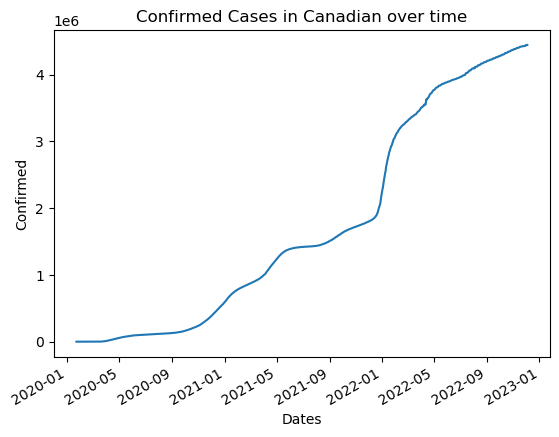

In [ ]:
fig = plt.figure()
plt.plot_date(can_merge['Date'], can_merge['Confirmed'],'-')

plt.title('Confirmed Cases in Canadian over time')
plt.xlabel('Dates')
plt.ylabel('Confirmed')


plt.show()


## Canadian Market Stock

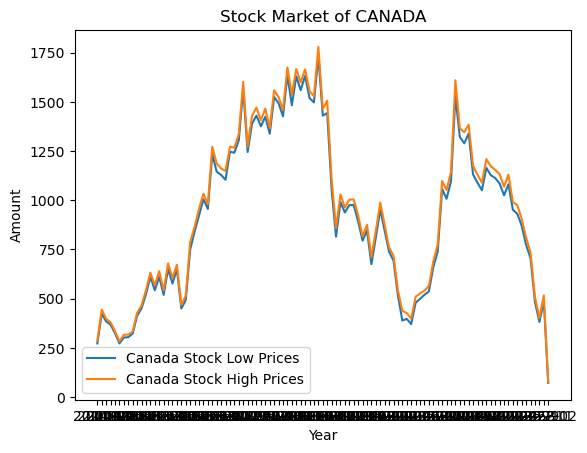

In [ ]:
plt.plot(stock["Year_Month"], stock["SPY_l"], label='Canada Stock Low Prices')
plt.plot(stock["Year_Month"], stock["SPY_h"],'-', label='Canada Stock High Prices')

plt.title("Stock Market of CANADA")
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()
fig.autofmt_xdate()
plt.show()

## Real Estate analysis

In [ ]:
data,meta_data = ts.get_daily_adjusted(symbol='TSE', outputsize='full')
data.reset_index(inplace=True)
stock = data[['date','2. high','3. low']]
stock['date'] = pd.to_datetime(stock['date'])
hi = tick + '_h'
lo = tick + '_l'
li = ['date',hi,lo]
stock.columns = li
stock['Year'] = stock['date'].dt.isocalendar().year
stock['Week'] = stock['date'].dt.isocalendar().week
stock['Month'] = stock['date'].dt.month

American Market Analysis

Platinum Market Analysis

In [4]:
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
deaths.drop(['Lat','Long'], axis = 1, inplace=True)

cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
cases.drop(['Lat','Long'], axis = 1, inplace=True)

In [5]:
deaths=deaths.melt(['Province/State', 'Country/Region'], var_name='Date', value_name='Deaths')
cases=cases.melt(['Province/State', 'Country/Region'], var_name='Date', value_name='Confrimed_cases')

In [6]:
merged_data=pd.merge(deaths, cases, how="left", on=['Province/State', 'Country/Region', 'Date'])
print(merged_data)

       Province/State        Country/Region     Date  Deaths  Confrimed_cases
0                 NaN           Afghanistan  1/22/20       0                0
1                 NaN               Albania  1/22/20       0                0
2                 NaN               Algeria  1/22/20       0                0
3                 NaN               Andorra  1/22/20       0                0
4                 NaN                Angola  1/22/20       0                0
...               ...                   ...      ...     ...              ...
303156            NaN    West Bank and Gaza  12/5/22    5708           703036
303157            NaN  Winter Olympics 2022  12/5/22       0              535
303158            NaN                 Yemen  12/5/22    2159            11945
303159            NaN                Zambia  12/5/22    4019           333746
303160            NaN              Zimbabwe  12/5/22    5620           259164

[303161 rows x 5 columns]


In [ ]:
#converting date to Week and Year (separate columns)
merged_data['Date'] = pd.to_datetime(merged_data['Date'], errors ='coerce')
merged_data['Week'] = merged_data['Date'].dt.week
merged_data['Month'] = merged_data['Date'].dt.month
merged_data['Year'] = merged_data['Date'].dt.year
merged_data.tail(5)

In [ ]:
weekly=merged_data.groupby(["Week",'Year','Country/Region'])['Deaths', 'Confrimed_cases'].sum().reset_index()
weekly.head(5)

In [ ]:
weekly_nocountry=weekly.groupby(['Year','Week'])['Deaths', 'Confrimed_cases'].sum().reset_index()

In [ ]:
monthly=merged_data.groupby(["Month",'Year','Country/Region'])['Deaths', 'Confrimed_cases'].sum().reset_index()

In [ ]:
monthly_nocountry=monthly.groupby(['Year',"Month"])['Deaths', 'Confrimed_cases'].sum().reset_index()
monthly_nocountry

In [ ]:
APIkey = 'GUF1WG74NP3ZQ4RR'
ts= TimeSeries(key = APIkey, output_format='pandas')
data, meta_data =ts.get_weekly(symbol='SPY')
data=data.reset_index()

data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
print(data)

In [ ]:
data['Week'] = data['Date'].dt.week
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

data=data.sort_values(['Date'], ascending=True)
data

In [ ]:
American_stock=data.groupby(['Week','Year','Month'])['High', 'Low','Close'].sum().reset_index()

In [ ]:
md_american=pd.merge(monthly_nocountry,American_stock , how="left")
#md_american.reset_index()
md_american['Count'] = md_american.reset_index().index
md_american['month_year']=md_american['Month'].map(str) +'-'+ md_american['Year'].map(str)
md_american

In [ ]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(md_american['month_year'], md_american['Confrimed_cases'], color="red", marker="o", label = 'Confirmed Cases')
# set x-axis label
ax.set_xlabel("Months", fontsize = 14)
# set y-axis label
ax.set_ylabel("Confirmed_cases count",
              color="red",
              fontsize=14)
#Next we use twinx() function to create the second axis object “ax2”. Now we use the second axis object “ax2” to make plot of the second y-axis variable and update their labels.

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(md_american['month_year'], md_american['Close'],color="green",marker="o", label = 'SPY Stock Prices')
ax2.set_ylabel("Stock Close",color="green",fontsize=14)
ax.tick_params(axis='x', labelrotation = 45)
fig.set_size_inches(30, 10)
ax.legend( loc=2)
ax2.legend(loc=1)
# plt.legend()
plt.show()

In [ ]:
ts2= TimeSeries(key = APIkey, output_format='pandas')
data_slv, meta_data =ts.get_weekly(symbol='AG')
data_slv=data_slv.reset_index()

data_slv.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
print(data_slv)

data_slv['Week'] = data_slv['Date'].dt.week
data_slv['Month'] = data_slv['Date'].dt.month
data_slv['Year'] = data_slv['Date'].dt.year

data_slv=data_slv.sort_values(['Date'], ascending=True)
data_slv

Silver_stock=data_slv.groupby(['Week','Year','Month'])['High', 'Low','Close'].sum().reset_index()
Silver_stock

In [ ]:
Silver_stock=pd.merge(monthly_nocountry,Silver_stock , how="inner")
#md_american.reset_index()
Silver_stock['Count'] = Silver_stock.reset_index().index
Silver_stock['month_year']=Silver_stock['Month'].map(str) +'-'+ Silver_stock['Year'].map(str)
Silver_stock

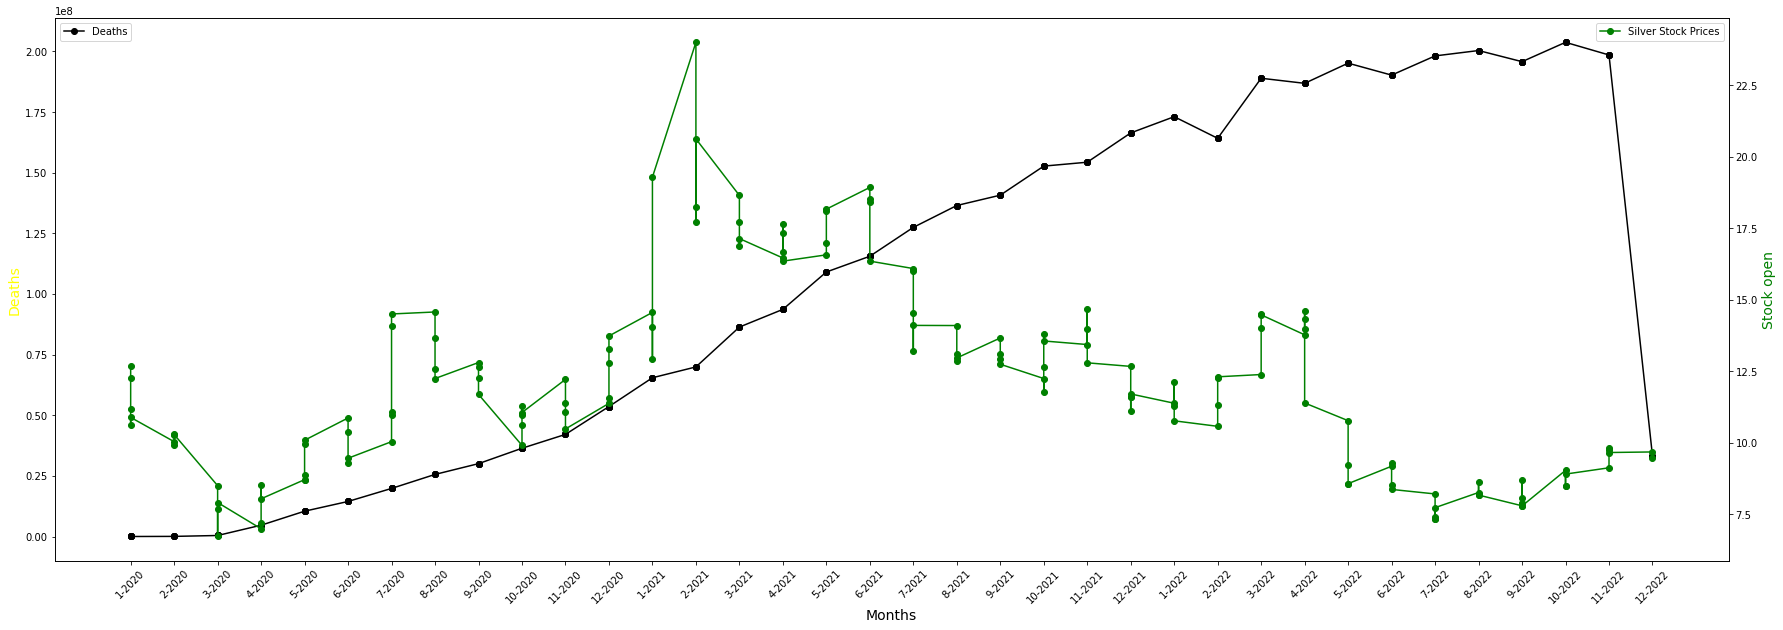

In [22]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(Silver_stock['month_year'], Silver_stock['Deaths'], color="Black", marker="o", label = 'Deaths')
# set x-axis label
ax.set_xlabel("Months", fontsize = 14)
# set y-axis label
ax.set_ylabel("Deaths",
              color="Yellow",
              fontsize=14)
#Next we use twinx() function to create the second axis object “ax2”. Now we use the second axis object “ax2” to make plot of the second y-axis variable and update their labels.

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(Silver_stock['month_year'], Silver_stock['High'],color="green",marker="o", label = 'Silver Stock Prices')
ax2.set_ylabel("Stock open",color="green",fontsize=14)
ax.tick_params(axis='x', labelrotation = 45)
fig.set_size_inches(30, 10)
ax.legend( loc=2)
ax2.legend(loc=1)
# plt.legend()
plt.show()